<a href="https://www.kaggle.com/mohamedbakrey/mnist-using-different-models-in-deep-learning?scriptVersionId=88338429" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Dense, Activation, SimpleRNN

# Loading Data

In [104]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [105]:
print("Train Data:", x_train.shape)
print("Train Data:", y_train.shape)
print("Train Data:", x_test.shape)
print("Train Data:", y_test.shape)

Train Data: (60000, 28, 28)
Train Data: (60000,)
Train Data: (10000, 28, 28)
Train Data: (10000,)


# compute the number of labels

In [106]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [107]:
print("Number Of Labels:",num_labels)

Number Of Labels: 10


In [108]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [109]:
print("Train after make To_Categorical:", y_train.shape)
print("Test after make To_Categorical:", y_test.shape)


Train after make To_Categorical: (60000, 10)
Test after make To_Categorical: (10000, 10)


In [110]:
# input image dimensions
image_size = x_train.shape[1]

In [111]:
print("Image Size:", image_size)

Image Size: 28


# Resize and Normalize

In [112]:
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])

In [113]:
print("Train After Make Normalize:",x_train.shape)
print("Test After Make Normalize:",x_test.shape)

Train After Make Normalize: (60000, 28, 28, 1)
Test After Make Normalize: (10000, 28, 28, 1)


In [114]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [115]:
print("Train After Make Normalize:",x_train.shape)
print("Test After Make Normalize:",x_test.shape)

Train After Make Normalize: (60000, 28, 28, 1)
Test After Make Normalize: (10000, 28, 28, 1)


# Network Parameters

In [116]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# Using CNN 

In [117]:
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu',
        input_shape=input_shape))


model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 576)             

### Plot the Summary by using plot_model

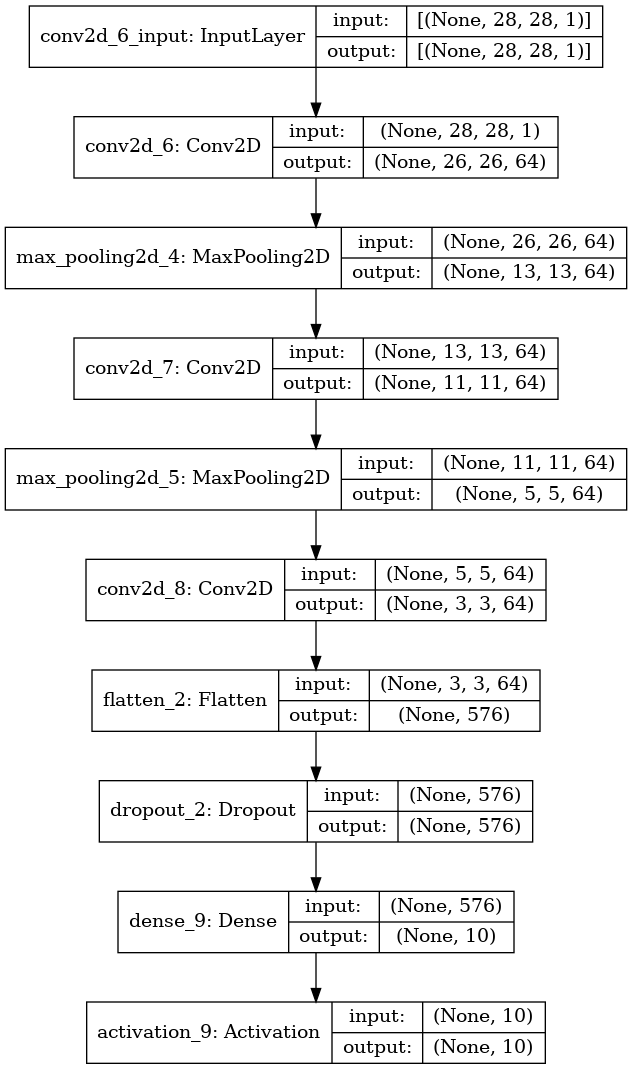

In [118]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [119]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [120]:
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 26s 55ms/step - loss: 0.2616 - accuracy: 0.9193
Epoch 2/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0657 - accuracy: 0.9799
Epoch 3/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0462 - accuracy: 0.9855
Epoch 4/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0377 - accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0320 - accuracy: 0.9901
Epoch 6/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0267 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 8/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0211 - accuracy: 0.9932
Epoch 9/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0180 - accuracy: 0.9944
Epoch 10/10
469/469 [==============================] - 26s 55ms/step - loss: 0.017

In [121]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 1s 16ms/step - loss: 0.0263 - accuracy: 0.9917


In [122]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 99.2%


# Using RNN Network

In [123]:
# load mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [124]:
# compute the number of labels
num_labels = len(np.unique(Y_train))

In [125]:
# convert to one-hot vector
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [126]:
# resize and normalize
image_size = X_train.shape[1]
X_train = np.reshape(X_train,[-1, image_size, image_size])
X_test = np.reshape(X_test,[-1, image_size, image_size])

In [127]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [128]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

In [129]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
dropout=dropout,
input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


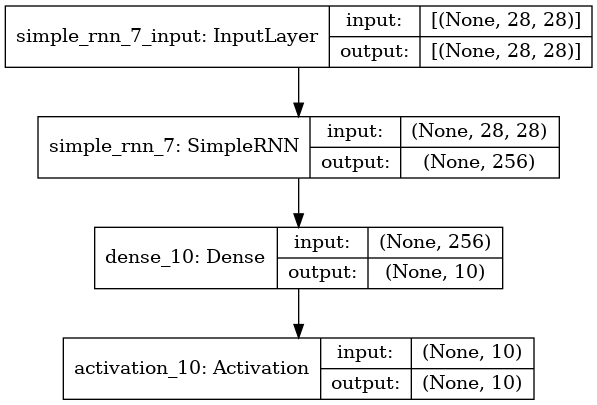

In [130]:
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [131]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])

In [132]:
# train the network
model.fit(X_train, Y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 17s 34ms/step - loss: 0.7366 - accuracy: 0.7927
Epoch 2/20
469/469 [==============================] - 16s 35ms/step - loss: 0.3239 - accuracy: 0.9061
Epoch 3/20
469/469 [==============================] - 16s 34ms/step - loss: 0.2401 - accuracy: 0.9295
Epoch 4/20
469/469 [==============================] - 16s 35ms/step - loss: 0.2005 - accuracy: 0.9399
Epoch 5/20
469/469 [==============================] - 16s 34ms/step - loss: 0.1752 - accuracy: 0.9476
Epoch 6/20
469/469 [==============================] - 17s 35ms/step - loss: 0.1579 - accuracy: 0.9530
Epoch 7/20
469/469 [==============================] - 16s 34ms/step - loss: 0.1453 - accuracy: 0.9555
Epoch 8/20
469/469 [==============================] - 17s 35ms/step - loss: 0.1329 - accuracy: 0.9597
Epoch 9/20
469/469 [==============================] - 16s 34ms/step - loss: 0.1252 - accuracy: 0.9627
Epoch 10/20
469/469 [==============================] - 17s 35ms/step - loss: 0.116

In [134]:
_, acc = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)


In [135]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 97.7%
